## Project Overview:

1. Background:
In recent years, the agricultural sector has faced considerable fluctuations in commodity prices, especially for staple foods like rice. These price changes impact various stakeholders, including farmers, consumers, and policymakers. Understanding the factors that drive price movements can help in forecasting future prices, assisting decision-making, and improving market stability.

2. Objective:
The objective of this analysis is to project the future price of rice by examining historical data on rice prices over several years. This will help in understanding how time (year) influences rice prices, and enable the prediction of future prices based on historical trends.

3. Problem Statement:
Price prediction for agricultural commodities, such as rice, is essential for effective market planning and policy formulation. By analyzing historical price data, we can identify trends and patterns that will guide us in projecting future prices with reasonable accuracy.

4. Approach:
To forecast the price of rice, we will use linear regression, a statistical technique that models the relationship between a dependent variable (in this case, rice price) and one or more independent variables (such as the year). We will:

    - Investigate how time (represented by the year) affects the rice price.
    - Use Ordinary Least Squares (OLS) regression to build a model based on this relationship.
    - Evaluate the performance of the model and interpret the results.

6. Dataset:
We will use historical data from various sources (such as government records, international agencies, or local market prices). This dataset contains information on the price of rice across different years and regions. We will clean and preprocess the data to ensure its quality and relevance for our analysis.

7. Scope and Limitations:
While this model focuses on the price of rice over time, there are several factors that could influence rice prices (e.g., weather patterns, inflation rates, government policies) that are not included in this simple model. Future improvements could involve incorporating additional variables for a more robust prediction model.

In [46]:
# packages for data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# packages for statistical analysis/hypothesis testing
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [5]:
df = pd.read_csv(r'C:\Users\escal\Downloads\wfp_food_prices_phl (1).csv').drop(0)

C:\Users\escal\AppData\Local\Temp\ipykernel_6936\4224565244.py:1: DtypeWarning: Columns (4,5,6,9,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\escal\Downloads\wfp_food_prices_phl (1).csv').drop(0)


### Data Exploration
- Check headers and contents
- Check datatypes

In [8]:
df.head(3)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.6,120.98,cereals and tubers,Maize flour (yellow),573,KG,actual,Retail,PHP,15,0.37
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.6,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,20,0.49
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.6,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.35,0.45


In [118]:
df.describe(include='all')

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,Month,Year
count,191143,191143,191143,191143,191143,191143.00,191143.00,191143,191143,191143.0,191143,191143,191143,191143,191143.000000,191143.00,191143,191143.0
unique,NaN,17,79,108,124,112.00,107.00,6,73,94.0,3,3,3,1,NaN,2306.00,12,<NA>
top,NaN,Region III,Davao del Sur,Davao City,180,8.48,120.59,vegetables and fruits,"Rice (regular, milled)",80.0,KG,actual,Retail,PHP,NaN,0.15,July,<NA>
freq,NaN,16792,7644,5274,3390,4295.00,6234.00,86429,8781,4993.0,184399,185802,184219,191143,NaN,1073.00,16906,<NA>
mean,2020-12-03 03:18:43.320236800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.810087,NaN,NaN,2020.415987
min,2000-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,2000.0
25%,2020-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.150000,NaN,NaN,2020.0
50%,2021-12-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.850000,NaN,NaN,2021.0
75%,2023-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.000000,NaN,NaN,2023.0
max,2025-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1216.670000,NaN,NaN,2025.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121512 entries, 1 to 121512
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       121512 non-null  object
 1   admin1     121512 non-null  object
 2   admin2     121512 non-null  object
 3   market     121512 non-null  object
 4   latitude   121512 non-null  object
 5   longitude  121512 non-null  object
 6   category   121512 non-null  object
 7   commodity  121512 non-null  object
 8   unit       121512 non-null  object
 9   priceflag  121512 non-null  object
 10  pricetype  121512 non-null  object
 11  currency   121512 non-null  object
 12  price      121512 non-null  object
 13  usdprice   121512 non-null  object
dtypes: object(14)
memory usage: 13.0+ MB


#### Add date columns and modify row lines for data uniformity 

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month_name()
df['Year'] = df['date'].dt.year.astype('Int64')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

replace_map = {
    'National Capital region': 'NCR',
    'Autonomous region in Muslim Mindanao': 'ARMM',
    'Cordillera Administrative region': 'CAR'
}

df['admin1'] = df['admin1'].replace(replace_map)

In [349]:
df.duplicated().sum()

0

In [351]:
df.isna().sum()

date            0
admin1          0
admin2          0
market          0
market_id       0
latitude        0
longitude       0
category        0
commodity       0
commodity_id    0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
Month           0
Year            0
dtype: int64

Filter data and focus on Flour and Rice as these are the basic food necessities in the region

Check price effects of wholesale and retail

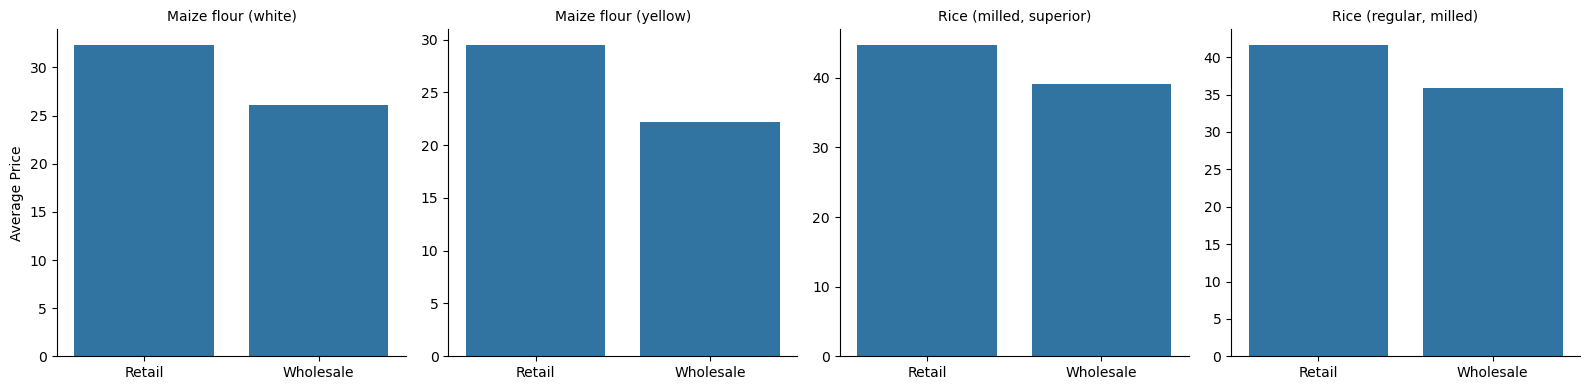

In [122]:
df_filtered = df[df['commodity'].isin([
    'Maize flour (white)', 
    'Maize flour (yellow)', 
    'Rice (milled, superior)', 
    'Rice (regular, milled)'
]) & (df['Year'] >= 2017)].sort_values(by='commodity')

# Create a FacetGrid: 1 graph per commodity
g = sns.FacetGrid(df_filtered, col='commodity', col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='pricetype', y='price', errorbar=None)

g.set_titles(col_template="{col_name}")   
g.set_axis_labels("", "Average Price")

plt.tight_layout()
plt.show()

There is a significant price difference between wholesale and retail, we need to filter the data using 'Retail' as this refers to the common people

Check the effect of Regions to the prices thru boxplot.

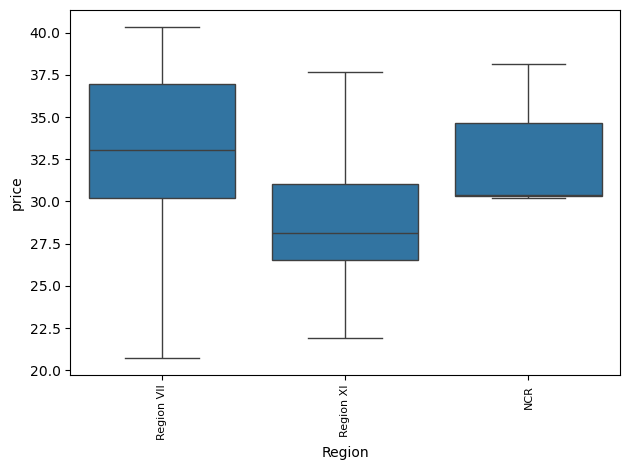

In [124]:
df_filtered_flour = df[df['commodity'].isin([
    'Maize flour (white)', 
    'Maize flour (yellow)', 
]) & (df['Year'] >= 2017)& (df['pricetype'] == 'Retail')].sort_values(by='commodity')

sns.boxplot(df_filtered_flour, x='admin1', y='price')

plt.xticks(rotation=90, size=8)
plt.xlabel('Region')
plt.tight_layout()
plt.show()

Data of flour is limited to three regions only, check the data of the rice.

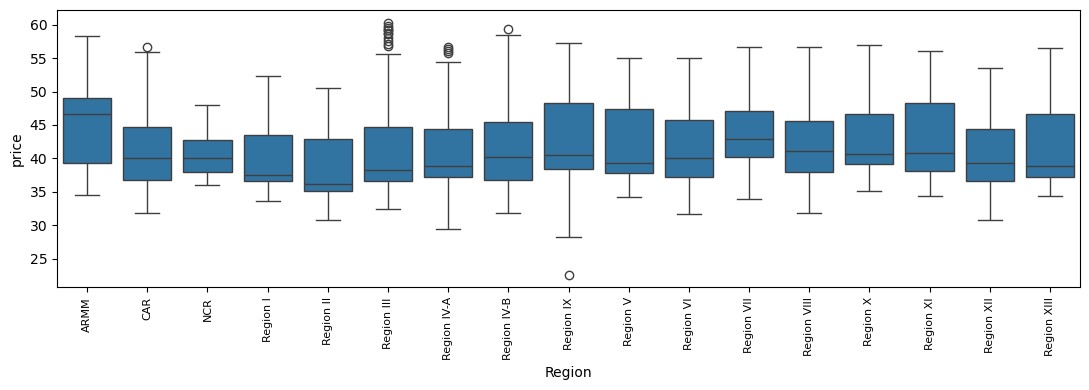

In [20]:
df_filtered_rice = df[df['commodity'].isin([
    'Rice (milled, superior)', 
    'Rice (regular, milled)'
]) & (df['Year'] >= 2017)& (df['pricetype'] == 'Retail')].sort_values(by='admin1')

plt.figure(figsize=(11,4))
sns.boxplot(df_filtered_rice, x='admin1', y='price')

plt.xticks(rotation=90, size=8)
plt.xlabel('Region')
plt.tight_layout()
plt.show()

Focus on rice data to check the OLS regression model

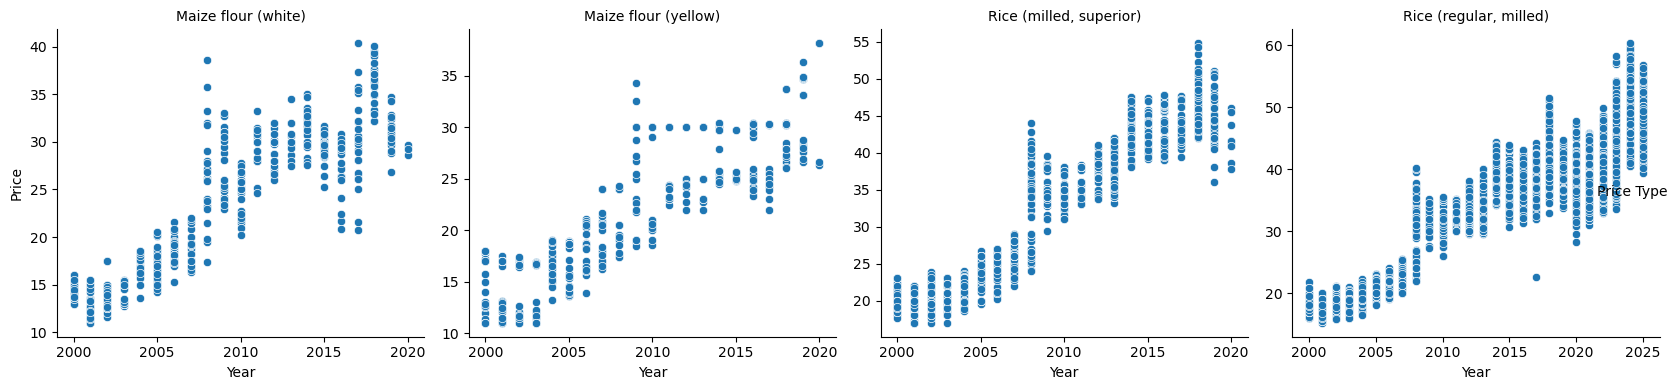

In [22]:
df_filtered_fullyear = df[(df['commodity'].isin([
    'Maize flour (white)', 
    'Maize flour (yellow)', 
    'Rice (milled, superior)', 
    'Rice (regular, milled)'
])) & (df['pricetype'] == 'Retail')].sort_values(by='commodity')
# Set up the FacetGrid
g = sns.FacetGrid(df_filtered_fullyear, col='commodity', col_wrap=4, height=4, sharex=False, sharey=False)

# Map a scatterplot to each subplot
g.map_dataframe(sns.scatterplot, x='Year', y='price')

# Titles and axis labels
g.set_titles(col_template="{col_name}")  # Each plot title = commodity name
g.set_axis_labels("Year", "Price")
g.add_legend(title="Price Type") 

plt.tight_layout()
plt.show()

Filter data to Rice(regular, milled) as this represents more complete data

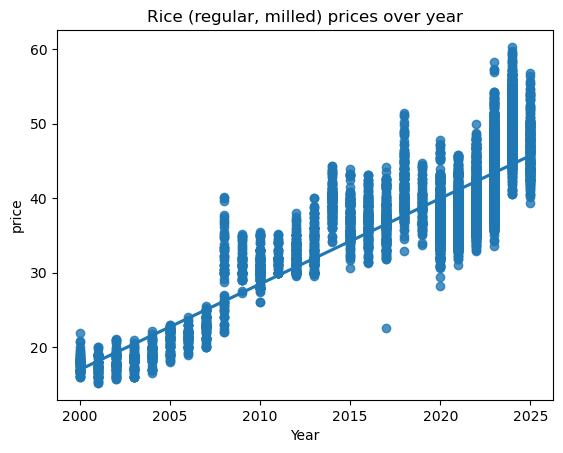

In [30]:
df_filtered_fullyear_rice = df[(df['commodity'].isin([
    'Rice (regular, milled)'])) &
    (df['pricetype'] == 'Retail')].sort_values(by='commodity')

sns.regplot(df_filtered_fullyear_rice, x='Year', y='price')

plt.title('Rice (regular, milled) prices over year')
plt.show()

In [36]:
df_filtered_fullyear_rice_ols = df_filtered_fullyear_rice[['Year', 'price']]

In [90]:
import pandas as pd
import statsmodels.api as sm

df_filtered_fullyear_rice = df_filtered_fullyear_rice.astype({'Year': 'float64', 'price': 'float64'})

# Define variables
X = df_filtered_fullyear_rice[['Year']]
y = df_filtered_fullyear_rice['price']

X = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:52:54   Log-Likelihood:                -21299.
No. Observations:                7318   AIC:                         4.260e+04
Df Residuals:                    7316   BIC:                         4.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2283.3295     16.843   -135.561      0.000   -2316.348   -2250.311
Year           1.1501      0.008    137.839      0.000       1.134       1.167
==============================================================================
Omnibus:                      311.640   Durbin-Watson:                   0.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.853
Skew:                           0.497   Prob(JB):                     1.43e-72
Kurtosis:                       2.691   Cond. No.                     6.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Key Findings:
- R-squared has a value of 0.722 - This means that approximately 72.2% of the variation in the price can be explained by the year. In other words, year is a strong predictor of price changes.
- p-value: 0.000 - This high F-statistic and its associated low p-value indicate that the model as a whole is statistically significant. It confirms that year as a meaningful relationship with price.
- Year coefficient: 1.15 - For each additional year, the price increases by approximately 15%. This indicates a positive trend over time, where prices are expected to rise steadily with each passing year.

### Conclusion:
The year is a statistically significant factor affecting price, with an average price increase of 15% per year. This model explains 72.2% of the variation in price, which is a good fit, but there may be some autocorrelation and non-normality in the residuals, suggesting room for improvement. Further steps could include exploring additional factors influencing price changes, such as inflation, region, or other economic indicators.